In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from numpy import linalg as LA
from scipy.fftpack import ifftn, fftshift
import os
from numpy.fft import fft2, fftshift, ifft2
from scipy.signal import fftconvolve, windows
import matplotlib 
from scipy.signal.windows import kaiser

FONTSIZE=10


# Fig 1: Interface Sketch

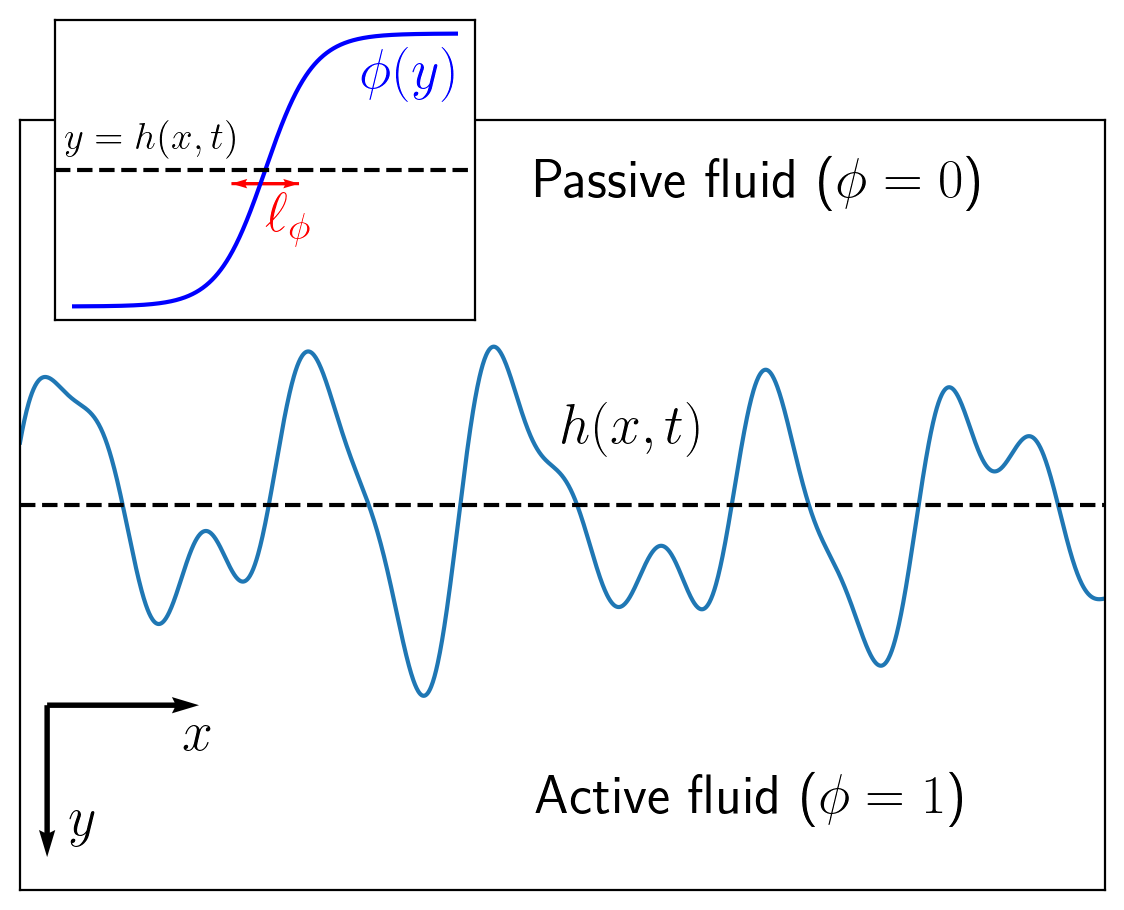

In [3]:
matplotlib.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 12

import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(7, 5), dpi=200)
xx = np.arange(0, 20, 0.01)

# Sum of various sine and cosine waves with non-integer, non-harmonically related frequencies
y = 1.5 * np.sin(1.5 * xx) + 0.75 * np.sin(2.3 * xx + 0.5) + 0.5 * np.cos(3.7 * xx) + \
    0.3 * np.sin(1.8 * xx - 0.3) + 0.2 * np.cos(1.9 * xx + 1.0) + \
    0.4 * np.sin(0.3 * xx) * np.exp(-0.1 * (xx - 10)**2) + \
    0.4 * np.cos(0.3 * xx) * np.exp(-0.1 * (xx - 15)**2)

y= y - np.mean(y)

plt.plot(xx, y)
plt.axhline(0, c='k', ls='--')

# Your quiver and text code
# plt.quiver(8.7, 0, 0, 1.3, scale=10, width=0.005)
plt.text(10, 0.8, r'$h(x,t)$', fontsize=20)

plt.quiver(0.5, -2.6, 0, -1.4, scale=10, width=0.005)
plt.text(0.9, -4.3, r'$y$', fontsize=20)
plt.quiver(0.5, -2.6, 1.4, 0, scale=10, width=0.005)
plt.text(3.0, -3.2, r'$x$', fontsize=20)

plt.text(9.5, -4, r'Active fluid ($ \phi =1$)', fontsize=20)
plt.text(9.5, 4, r'Passive fluid ($ \phi =0$)', fontsize=20)

plt.ylim([-5, 5])
plt.xlim([0, 20])

plt.gca().set_xticks([])
plt.gca().set_yticks([])


left, bottom, width, height = [0.15, 0.68, 0.30, 0.30]
ax2 = fig.add_axes([left, bottom, width, height])
xx2 = np.arange(-4,4, 0.01)
ax2.plot(xx2, np.tanh(xx2), c='b')
ax2.axhline(0,c='k', ls='--')
ax2.text(-4.2, 0.15, r'$y = h(x,t)$', fontsize=14)
ax2.text(2.0, 0.6, r'${\phi}(y)$', c='b', fontsize=20, weight='bold')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.quiver(-1/np.sqrt(2), -0.1, 2/np.sqrt(2), 0, angles='xy', scale_units='xy', scale=1., color='r')
ax2.quiver(1/np.sqrt(2), -0.1, -2/np.sqrt(2), 0, angles='xy', scale_units='xy', scale=1., color='r')
ax2.text(0, -0.45, r'$\ell_\phi$', color='r', fontsize=20, weight='bold')

# plt.savefig('Interface_Fluctuations_Schematic_2.jpg',  format='jpg', bbox_inches='tight', pad_inches=0.1)

plt.show()

## Fig 2: Ordered Nematic

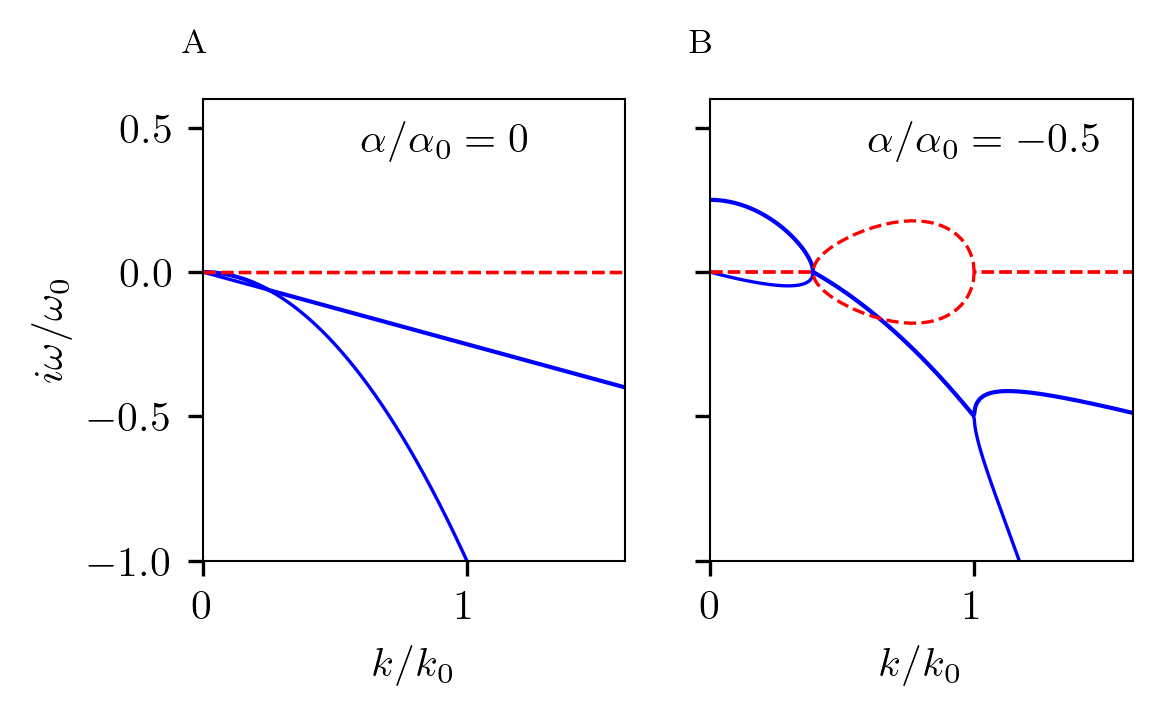

In [4]:
plt.rcParams["figure.figsize"] = (4,2)
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams['text.usetex'] = True

def mat_nematic_frictionless(k, par):
    alpha, sigma, D, eta, lmbda = par
    
    A11 = -sigma * np.abs(k) / (4 * eta)
    A12 = -1j*alpha / (2 * eta * k)
    A21 = (sigma *  k * np.abs(k) / (4 * eta) )*1j*k 
    A22 = -alpha * (lmbda) / (2 * eta) - D * k**2
    
    return A11, A12, A21, A22


kRange = np.linspace(0.001, 3.14, num=1000)

sigma = 1
D = 1
eta = 1
lmbda = 1.0


fig, ax = plt.subplots(1,2, sharey=True)
ax[0].set_ylabel(r'$i\omega/\omega_0$', fontsize=FONTSIZE)

for ii, alpha in enumerate([0,-0.5]):
    par = alpha, sigma, D, eta, lmbda


    yReal = np.zeros((2, len(kRange)))
    yIm = np.zeros((2, len(kRange)))

    for ki, k in enumerate(kRange):
        A11, A12, A21, A22 = mat_nematic_frictionless(k, par)       
        w, _ = LA.eig(np.array([[A11, A12], [A21, A22]]))
        yReal[:, ki] = w.real
        yIm[:, ki] = w.imag
        
    yReal = np.sort(yReal,axis=0)
    yIm = np.sort(yIm, axis=0)

    ax[ii].plot(kRange, yReal[0], 'b', label='Real', linewidth=0.8)
    ax[ii].plot(kRange, yReal[1], 'b', linewidth=1.0)
    ax[ii].plot(kRange, yIm[0], 'r', ls ='--', label='Imaginary', linewidth=0.8)
    ax[ii].plot(kRange, yIm[1], 'r', ls= '--', linewidth=0.8)
    ax[ii].set_xlabel(r'$k/k_0$', fontsize=FONTSIZE)
    ax[ii].set_ylim([-2, 1])
    # ax[ii].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
    # ax[ii].yaxis.set_major_locator(plt.MultipleLocator(1))

    ax[ii].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    # ax[ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))


    ax[ii].spines['bottom'].set_linewidth(0.5)
    ax[ii].spines['top'].set_linewidth(0.5)
    ax[ii].spines['left'].set_linewidth(0.5)
    ax[ii].spines['right'].set_linewidth(0.5)
    # ax[ii].text(0.1, -0.8, r'$\alpha/\alpha_0= '+str(alpha) +'$', fontsize=FONTSIZE,bbox=dict(facecolor='white', edgecolor='none'), zorder=0)
    ax[ii].text(0.6, 0.42, r'$\alpha/\alpha_0= '+str(alpha) +'$', fontsize=FONTSIZE,bbox=dict(facecolor='white', edgecolor='none'), zorder=0)
    ax[ii].set_xlim([0, 1.6])
    ax[ii].set_ylim([-1, 0.6])

ax[0].text(-0.05, 1.15, r'$\rm{A}$', ha='left', va='top', transform=ax[0].transAxes, fontsize=8)
ax[1].text(-0.05, 1.15, r'$\rm{B}$', ha='left', va='top', transform=ax[1].transAxes, fontsize=8)

plt.show()

## where $$\omega_0 = \frac{\sigma^2}{\eta^2 D}, k_0 = \frac{\sigma}{\eta D}, \alpha_0 = \frac{\sigma^2}{D\eta}$$

# Fig 3: Isotropic LC

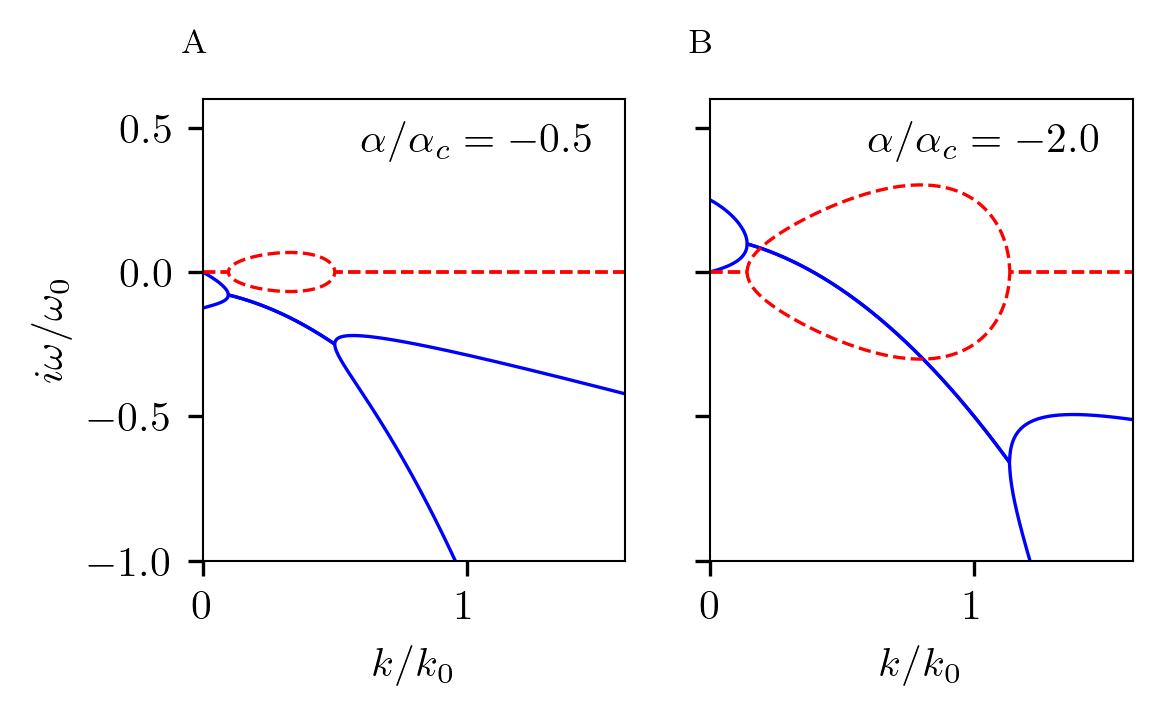

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from numpy import linalg as LA
from scipy.fftpack import ifftn, fftshift

plt.rcParams["figure.figsize"] = (4,2)
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams['text.usetex'] = True


def mat(k, par):
    alpha, sigma, DQ, eta, lmbda, tau = par
    
    A = -sigma * np.abs(k) / (4 * eta)
    B = alpha / (4 * eta * k)
    C = sigma * lmbda * k * np.abs(k) / (4 * eta)
    D = -alpha * lmbda / (4 * eta) - 1 / tau - DQ * k**2
    
    return A, B, C, D

FONTSIZE=10
sigma = 1
DQ = 1
eta = 1
lmbda = 1
tau = 4.0
fig, ax = plt.subplots(1,2, sharey=True)
ax[0].set_ylabel(r'$i\omega/\omega_0$', fontsize=FONTSIZE)
plt.ylim([-3, 1.5])
ax[0].set_xlabel(r'$k/k_0$', fontsize=FONTSIZE)
ax[1].set_xlabel(r'$k/k_0$', fontsize=FONTSIZE)

alpc = tau*lmbda/(4*eta)

for ii in range(2):
    if ii==0:
        alpha=-0.5
    elif ii==1:
        alpha=-2.0

    par = alpha, sigma, DQ, eta, lmbda, tau

    kRange = np.linspace(0.001, 2, num=1000)

    yReal = np.zeros((2, len(kRange)))
    yIm = np.zeros((2, len(kRange)))

    for ki, k in enumerate(kRange):
        A, B, C, D = mat(k, par)       
        w, _ = LA.eig(np.array([[A, B], [C, D]]))
        yReal[:, ki] = w.real
        yIm[:, ki] = w.imag
        
    yReal = np.sort(yReal, axis=0)
    yIm = np.sort(yIm, axis=0)

    ax[ii].plot(kRange, yReal[0], 'b', label='Real', linewidth=0.8)
    ax[ii].plot(kRange, yReal[1], 'b', linewidth=0.8)
    ax[ii].plot(kRange, yIm[0], 'r', ls='--', label='Imaginary', linewidth=0.8)
    ax[ii].plot(kRange, yIm[1], 'r', ls='--', linewidth=0.8)

#        plt.title(r'$a = $'+str(np.abs(alpha/4)), fontsize=15)
    # ax[ii].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
    # ax[ii].yaxis.set_major_locator(plt.MultipleLocator(1))

    ax[ii].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    # ax[ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

    ax[ii].spines['bottom'].set_linewidth(0.5)
    ax[ii].spines['top'].set_linewidth(0.5)
    ax[ii].spines['left'].set_linewidth(0.5)
    ax[ii].spines['right'].set_linewidth(0.5)

    # ax[ii].text(0.04, -0.92, r'$\alpha/\alpha_c = '+str(alpha/alpc) +r'$', fontsize=FONTSIZE)
    ax[ii].text(0.6, 0.42, r'$\alpha/\alpha_c = '+str(alpha/alpc) +r'$', fontsize=FONTSIZE)
    ax[ii].set_xlim([0, 1.6])
    ax[ii].set_ylim([-1, 0.6])

ax[0].text(-0.05, 1.15, r'$\rm{A}$', ha='left', va='top', transform=ax[0].transAxes, fontsize=8)
ax[1].text(-0.05, 1.15, r'$\rm{B}$', ha='left', va='top', transform=ax[1].transAxes, fontsize=8)

plt.show()

# Fig 4: Isotropic LC + Gravity

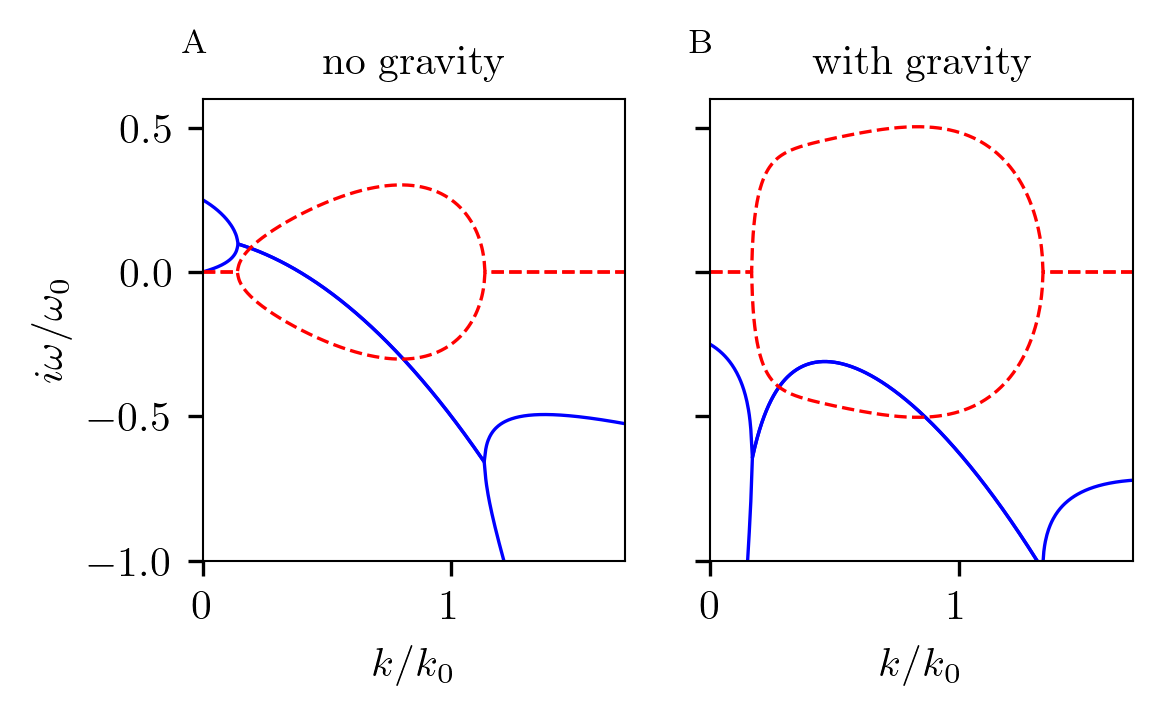

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
from numpy import linalg as LA
from scipy.fftpack import ifftn, fftshift

plt.rcParams["figure.figsize"] = (4,2)
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams['text.usetex'] = True


def mat(k, par):
    alpha, sigma, DQ, eta, lmbda, tau, lcInverse = par
    
    A = -sigma * (k**2 + lcInverse**2) / (4 * eta *np.abs(k))
    B = alpha / (4 * eta * k)
    C = sigma * lmbda * (k**2 + lcInverse**2)/ (4 * eta)
    D = -alpha * lmbda / (4 * eta) - 1 / tau - DQ * k**2
    
    return A, B, C, D

FONTSIZE=10

sigma = 1
DQ = 1
eta = 1
lmbda = 1
tau = 4.0

alpha= -2.0


fig, ax = plt.subplots(1,2, sharey=True)
ax[0].set_ylabel(r'$i\omega/\omega_0$', fontsize=FONTSIZE)
plt.ylim([-3, 1.5])
ax[0].set_xlabel(r'$k/k_0$', fontsize=FONTSIZE)
ax[1].set_xlabel(r'$k/k_0$', fontsize=FONTSIZE)


for ii in range(2):
    if ii==0:
        lcInverse = 0.0
    elif ii==1:
        lcInverse= 1.0

    par = alpha, sigma, DQ, eta, lmbda, tau,lcInverse

    kRange = np.linspace(0.001, 3.14, num=1000)

    yReal = np.zeros((2, len(kRange)))
    yIm = np.zeros((2, len(kRange)))

    for ki, k in enumerate(kRange):
        A, B, C, D = mat(k, par)       
        w, _ = LA.eig(np.array([[A, B], [C, D]]))
        yReal[:, ki] = w.real
        yIm[:, ki] = w.imag
        
    yReal = np.sort(yReal, axis=0)
    yIm = np.sort(yIm, axis=0)

    ax[ii].plot(kRange, yReal[0], 'b', label='Real', linewidth=0.8)
    ax[ii].plot(kRange, yReal[1], 'b', linewidth=0.8)
    ax[ii].plot(kRange, yIm[0], 'r', ls='--', label='Imaginary', linewidth=0.8)
    ax[ii].plot(kRange, yIm[1], 'r', ls='--', linewidth=0.8)

#        plt.title(r'$a = $'+str(np.abs(alpha/4)), fontsize=15)
    # ax[ii].xaxis.set_major_locator(plt.MultipleLocator(np.pi / 3))
    # ax[ii].yaxis.set_major_locator(plt.MultipleLocator(1))

    ax[ii].tick_params(axis='both', which='major', labelsize=FONTSIZE)

    # ax[ii].xaxis.set_major_formatter(plt.FuncFormatter(format_func))

    ax[ii].spines['bottom'].set_linewidth(0.5)
    ax[ii].spines['top'].set_linewidth(0.5)
    ax[ii].spines['left'].set_linewidth(0.5)
    ax[ii].spines['right'].set_linewidth(0.5)

    # ax[ii].text(0.2, -0.9, r'$\ell_c^{-1}/k_0= '+str(lcInverse) +'$', fontsize=FONTSIZE)
    ax[ii].set_xlim([0, 1.7])
    ax[ii].set_ylim([-1.0, 0.6])


ax[0].set_title(r'$\rm{no \; gravity}$', fontsize=10)
ax[1].set_title(r'$\rm{with \; gravity}$', fontsize=10)

ax[0].text(-0.05, 1.15, r'$\rm{A}$', ha='left', va='top', transform=ax[0].transAxes, fontsize=8)
ax[1].text(-0.05, 1.15, r'$\rm{B}$', ha='left', va='top', transform=ax[1].transAxes, fontsize=8)

plt.show()


# Fig Appendix: Ordered Nematic: Finite $\ell$

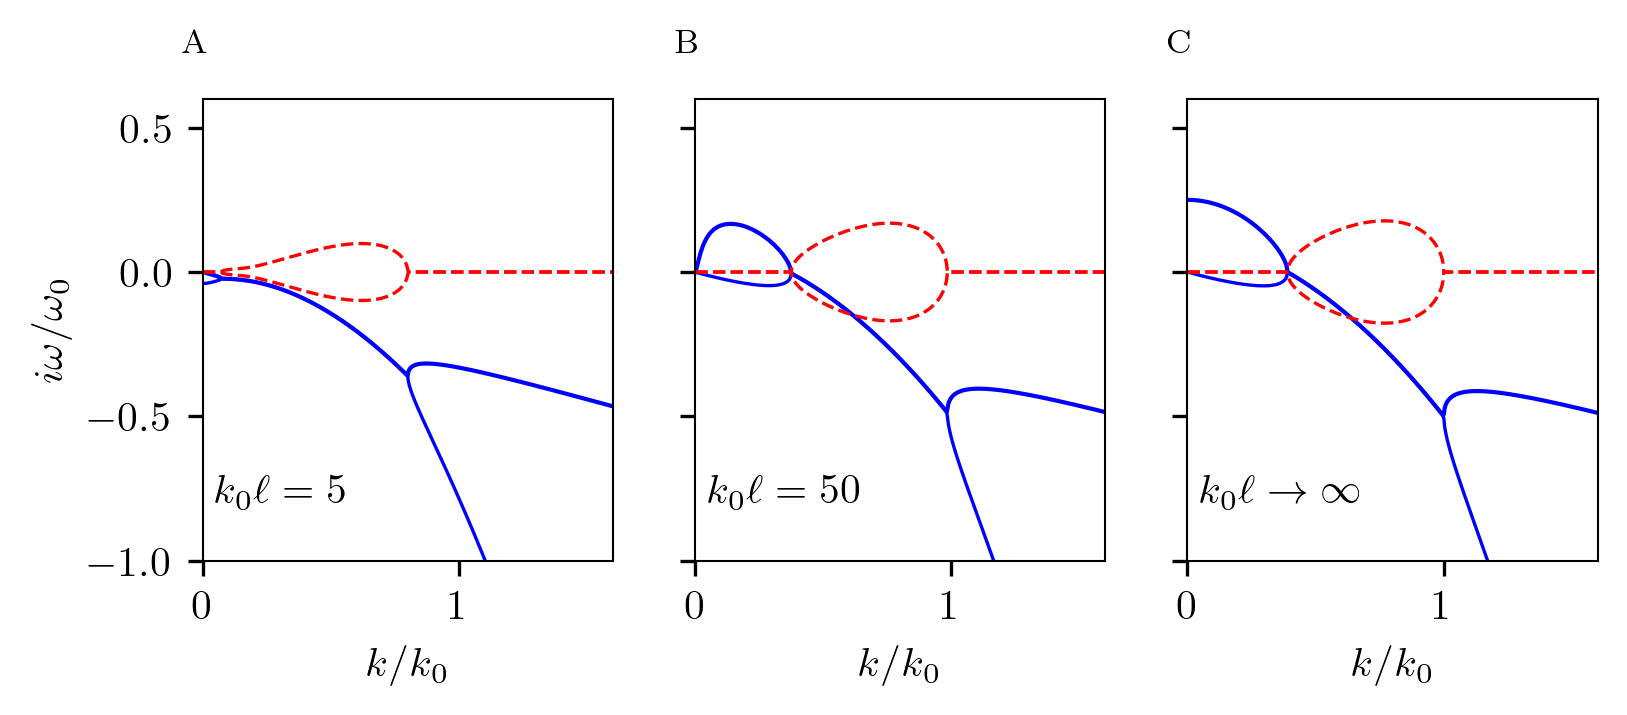

In [7]:
plt.rcParams["figure.figsize"] = (6,2)
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams['text.usetex'] = True

def mat_nematic_frictionless(k, par):
    alpha, sigma, D, eta, lmbda, ell = par
    
    A11 = -sigma * np.abs(k) / (4 * eta)
    A12 = 1j*k*(alpha / (2 * eta))*(ell/(1+k*ell))**2 
    A21 = -(sigma *  k * np.abs(k) / (4 * eta) )*1j*k 
    A22 = -(alpha / (2 * eta))*(  ((lmbda+1)/2) * (k*ell/(1+k*ell))**2 + ((lmbda-1)/2)*(1 + (1/(1+k*ell)**2))   ) - D * (k**2+1/ell**2)
    
    return A11, A12, A21, A22


kRange = np.linspace(0.001, 3.14, num=1000)

sigma = 1
D = 1
eta = 1
lmbda = 1.0
alpha =-0.5


fig, ax = plt.subplots(1,3, sharey=True)
ax[0].set_ylabel(r'$i\omega/\omega_0$', fontsize=FONTSIZE)

for ii, ell in enumerate([5, 50, 1000000]):
    par = alpha, sigma, D, eta, lmbda, ell


    yReal = np.zeros((2, len(kRange)))
    yIm = np.zeros((2, len(kRange)))

    for ki, k in enumerate(kRange):
        A11, A12, A21, A22 = mat_nematic_frictionless(k, par)       
        w, _ = LA.eig(np.array([[A11, A12], [A21, A22]]))
        yReal[:, ki] = w.real
        yIm[:, ki] = w.imag
        
    yReal = np.sort(yReal,axis=0)
    yIm = np.sort(yIm, axis=0)

    ax[ii].plot(kRange, yReal[0], 'b', label='Real', linewidth=0.8)
    ax[ii].plot(kRange, yReal[1], 'b', linewidth=1.0)
    ax[ii].plot(kRange, yIm[0], 'r', ls ='--', label='Imaginary', linewidth=0.8)
    ax[ii].plot(kRange, yIm[1], 'r', ls= '--', linewidth=0.8)
    ax[ii].set_xlabel(r'$k/k_0$', fontsize=FONTSIZE)
    ax[ii].set_ylim([-2, 1])

    ax[ii].tick_params(axis='both', which='major', labelsize=FONTSIZE)


    ax[ii].spines['bottom'].set_linewidth(0.5)
    ax[ii].spines['top'].set_linewidth(0.5)
    ax[ii].spines['left'].set_linewidth(0.5)
    ax[ii].spines['right'].set_linewidth(0.5)


    if ii != 2: 
        ax[ii].text(0.05, -0.8, r'$ k_0 \ell  = '+str(ell) +'$', fontsize=FONTSIZE,bbox=dict(facecolor='white', edgecolor='none'), zorder=0)
    if ii ==2:
        ax[ii].text(0.05, -0.8, r'$ k_0 \ell \rightarrow \infty$', fontsize=FONTSIZE,bbox=dict(facecolor='white', edgecolor='none'), zorder=0)


    ax[ii].set_xlim([0, 1.6])
    ax[ii].set_ylim([-1, 0.6])

ax[0].text(-0.05, 1.15, r'$\rm{A}$', ha='left', va='top', transform=ax[0].transAxes, fontsize=8)
ax[1].text(-0.05, 1.15, r'$\rm{B}$', ha='left', va='top', transform=ax[1].transAxes, fontsize=8)
ax[2].text(-0.05, 1.15, r'$\rm{C}$', ha='left', va='top', transform=ax[2].transAxes, fontsize=8)

plt.show()
